#Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas, determina el máximo para filas y columnas (uno para cada) y muestra el número de valores que superan en cada caso 0.95*máximo.

Column values above threshold:  [ 94 105 110 112 131 381 386 396]
Number of columns above threshold: 8
Row values above threshold:  [510]
Number of rows above threshold: 1


(0.0, 512.0)

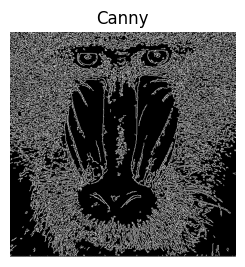

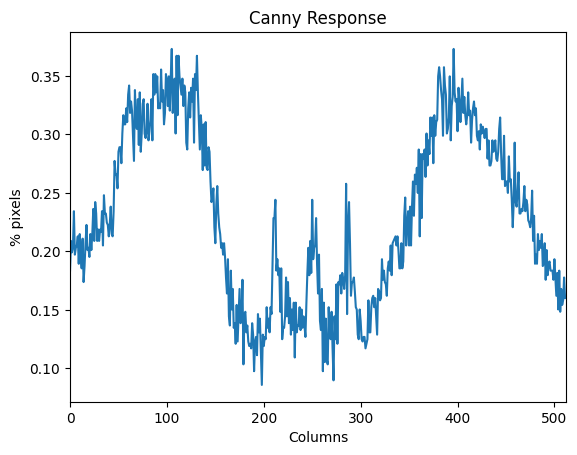

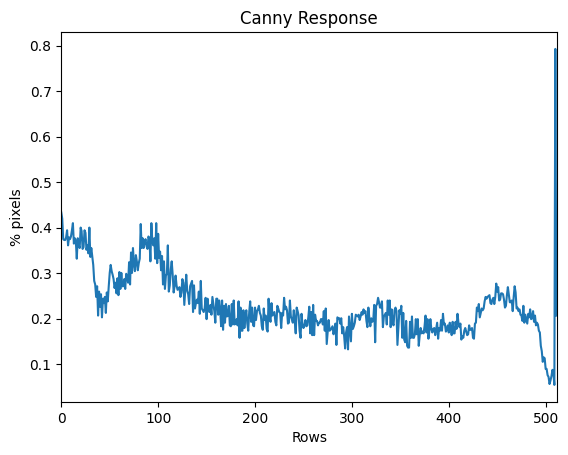

In [8]:
# Read image from file
img = cv2.imread('mandril.jpg') 
# Convert original BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply Canny edge detector
canny = cv2.Canny(gray, 100, 200)

# Set threshold for considering values above
umbral = 0.95

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

# Columns
# Count the number of white pixels (255) per column
# Sum the pixel values per column
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalize based on the number of rows and the maximum pixel value (255)
# The result will be the number of white pixels per column
cols = col_counts[0] / (255 * canny.shape[1])

values_above_threshold_col = np.where(cols > umbral*max(cols))[0]
print("Column values above threshold: ", values_above_threshold_col)
print(f"Number of columns above threshold: {len(values_above_threshold_col)}")

# Display the count graphically
plt.figure()
plt.title("Canny Response")
plt.xlabel("Columns")
plt.ylabel("% pixels")
plt.plot(cols)
# x-range defined by the columns
plt.xlim([0, canny.shape[0]])

# Rows
# Count the number of white pixels (255) per row
# Sum the pixel values per row
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalize based on the number of rows and the maximum pixel value (255)
# The result will be the number of white pixels per row
rows = row_counts[:, 0] / (255 * canny.shape[0])

values_above_threshold_row = np.where(rows > umbral*max(rows))[0]
print("Row values above threshold: ", values_above_threshold_row)
print(f"Number of rows above threshold: {len(values_above_threshold_row)}")

# Display the count graphically
plt.figure()
plt.title("Canny Response")
plt.xlabel("Rows")
plt.ylabel("% pixels")
plt.plot(rows)
# x-range defined by the rows
plt.xlim([0, canny.shape[0]])

TAREA: Elige otra imagen, muestra el contenido de alguna de las imágenes resultado de Sobel antes y después de ajustar la escala

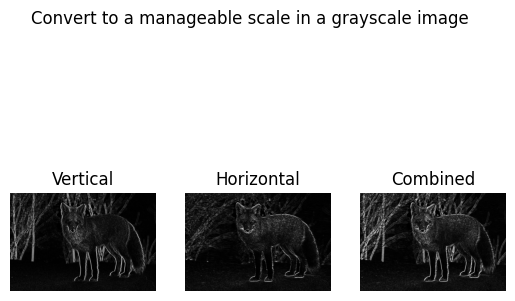

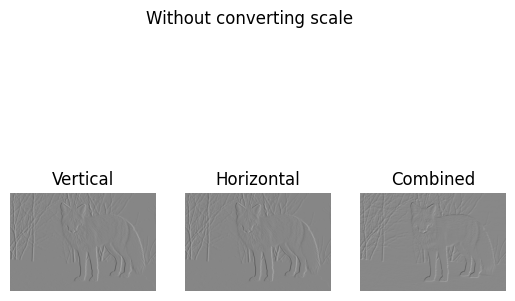

In [9]:
img = cv2.imread('fox-715588_1280.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussian blur to smooth the original image
ggray = cv2.GaussianBlur(gray, (3, 3), 0)

# Compute gradients in both directions (horizontal and vertical)
sobelx = cv2.Sobel(ggray, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggray, cv2.CV_64F, 0, 1)  # y
# Combine both results
sobel = cv2.add(sobelx, sobely)

# Show both results
plt.figure()
plt.suptitle('Convert to a manageable scale in a grayscale image')
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Vertical')
# Vertical
# To visualize, convert to a manageable scale in a grayscale image
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontal')
# Horizontal
# To visualize, convert to a manageable scale in a grayscale image
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combined')
# To visualize, convert to a manageable scale in a grayscale image
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 

# Show both results
plt.figure()
plt.subplot(1, 3, 1)
plt.suptitle('Without converting scale')
plt.axis("off")
plt.title('Vertical')
plt.imshow(sobelx, cmap='gray') # Without converting scale

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Horizontal')
plt.imshow(sobelx, cmap='gray') # Without converting scale

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Combined')
plt.imshow(sobel, cmap='gray') # Without converting scale

Documentación: <br>
https://www.tutorialspoint.com/opencv/opencv_sobel_operator.htm

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Major columns (Canny): [ 706 1267]
Major rows (Canny): [604 607 614]


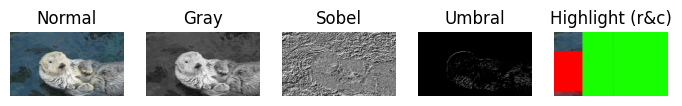

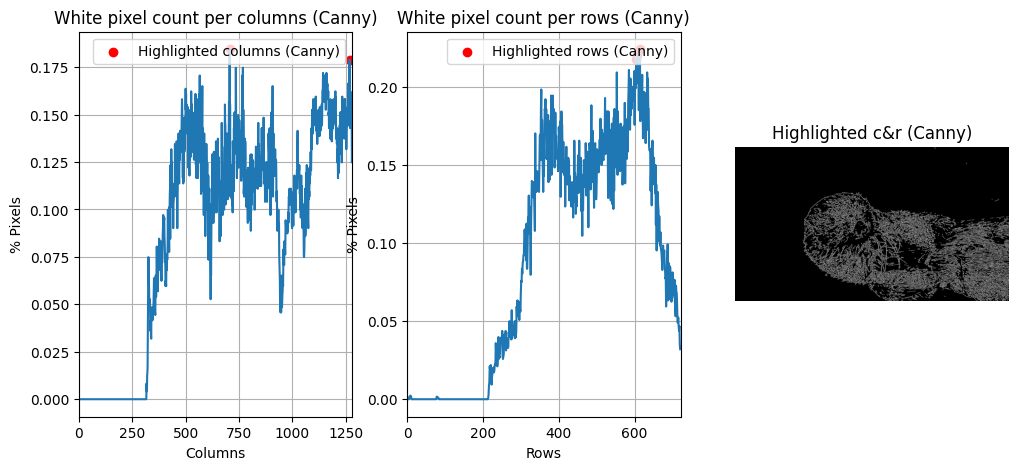

In [10]:
img = cv2.imread('otter-21004.jpg')
bgr_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Original image
plt.figure(figsize=(12, 5))
plt.subplot(1, 7, 1)
plt.title('Normal')
plt.axis('off')
plt.imshow(bgr_img)

# Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 7, 2)
plt.title('Gray')
plt.axis('off')
plt.imshow(gray, cmap='gray')

# Sobel operator
ggray = cv2.GaussianBlur(gray, (3, 3), 0)
sobelx = cv2.Sobel(ggray, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggray, cv2.CV_64F, 0, 1)  # y
sobel = cv2.add(sobelx, sobely)
sobel8 = np.uint8(sobel)
plt.subplot(1, 7, 3)
plt.title('Sobel')
plt.axis('off')
plt.imshow(sobel8, cmap='gray')

# Umbral calculation 
_, umbralImg = cv2.threshold(sobel, 175, 255, cv2.THRESH_BINARY)
plt.subplot(1, 7, 4)
plt.title('Umbral')
plt.axis('off')
plt.imshow(umbralImg, cmap='gray')

# Max per row and columns calculation
max_row = np.max(umbralImg, axis=1)
max_col = np.max(umbralImg, axis=0)

# Umbral value
umbral_val_row = 0.95 * np.max(max_row)
umbral_val_col = 0.95 * np.max(max_col)

# Highlight rows and columns
rows_highlighted = np.where(max_row > umbral_val_row)[0]
cols_highlighted = np.where(max_col > umbral_val_col)[0]

# Highlight lines rows and cols by drawing horizontal and vertical lines in the original image
for row in rows_highlighted:
    cv2.line(bgr_img, (0, row), (bgr_img.shape[1], row), (255, 0, 0), 1)
for col in cols_highlighted:
    cv2.line(bgr_img, (col, 0), (col, bgr_img.shape[0]), (23, 255, 0), 1)

plt.subplot(1, 7, 5)
plt.title("Highlight (r&c)")
plt.axis('off')
plt.imshow(bgr_img)

# Canny edge detection
canny = cv2.Canny(gray, 100, 200)

# Count white pixels in columns
col_counts_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()
cols_canny = col_counts_canny / (255 * canny.shape[0])

# Count white pixels in rows
row_counts_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1).flatten()
rows_canny = row_counts_canny / (255 * canny.shape[1])

# Find columns with pixel count above 95% of the maximum count
resmax1_canny = np.where(cols_canny >= cols_canny.max() * 0.95)[0]

# Find rows with pixel count above 95% of the maximum count
resmax2_canny = np.where(rows_canny >= rows_canny.max() * 0.95)[0]

# Print the results
print("Major columns (Canny):", resmax1_canny)
print("Major rows (Canny):", resmax2_canny)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("White pixel count per columns (Canny)")
plt.xlabel("Columns")
plt.ylabel("% Pixels")
plt.plot(cols_canny)
plt.scatter(resmax1_canny, cols_canny[resmax1_canny], c='red', marker='o', label='Highlighted columns (Canny)')
plt.xlim([0, canny.shape[1]])
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
plt.title("White pixel count per rows (Canny)")
plt.xlabel("Rows")
plt.ylabel("% Pixels")
plt.plot(rows_canny)
plt.scatter(resmax2_canny, rows_canny[resmax2_canny], c='red', marker='o', label='Highlighted rows (Canny)')
plt.xlim([0, canny.shape[0]])
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.title("Highlighted c&r (Canny)")
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR))
plt.axis('off')
plt.show()


Documentación: <br>
https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html <br>
https://numpy.org/doc/stable/reference/generated/numpy.where.html


TAREA: Asumiendo que quieren mostrar a personas que no forman parte del curso de VC el comportamiento de una o varias funciones de las vistas hasta este momento aplicadas sobre la entrada de la webcam. ¿Cuál(es) escogerían?

En el caso de mostrarle a una persona que no forma parte del curso, le explicaría el comportamiento una de las funciones del programa "Webcam y sustracción de modelo del fondo" y se lo explicaría de la siguiente manera: <br>
Este programa tiene dos funciones principales. La más fascinante, desde nuestro punto de vista, es la capacidad de utilizar la cámara de tu ordenador para crear un efecto de "fantasma". Lo que hace es eliminar el fondo para separar el entorno, osea que todo lo que está detrás de ti desaparece gradualmente. Luego, le da un toque adicional almisterio aplicando un efecto espejo a tu imagen, así pareces más etéreo. Con cada fotograma que captura la cámara, se crea una versión "fantasma" de ti mismo.
Para probarlos implemente muévete frente a la cámara para ver cómo tu imagen "fantasmal" se adapta en tiempo real.


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) propongan (los componentes de cada grupo) una reinterpretación del procesamiento de imágenes con las técnicas vistas o que conozcan.

In [11]:
def highlight_color(frame, color):
    '''
    Function to highlight objects of a specific color in the image
    '''
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the color range for the selected color
    lower_range, upper_range = colors[color]
    
    # Create a mask for the color in the range
    mask = cv2.inRange(hsv, np.array(lower_range), np.array(upper_range))
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)
    
    return result

# Dictionary of available colors and their HSV ranges
colors = {
    'White': ([0, 0, 200], [360, 40, 255]),
    'Red': ([0, 100, 100], [10, 255, 255]),
    'Green': ([35, 100, 100], [85, 255, 255]),
    'Blue': ([100, 100, 100], [130, 255, 255]),
    'Yellow': ([20, 100, 100], [30, 255, 255]),
    'Orange': ([10, 100, 100], [20, 255, 255]),
    'Purple': ([130, 100, 100], [160, 255, 255]),
    'Pink': ([160, 100, 100], [200, 255, 255]),
    'Brown': ([10, 50, 50], [30, 255, 100]),
    'Gray': ([0, 0, 50], [360, 40, 70])
}

# Key information
text = ["Buttons:",
        " 'r' for Red,",
        " 'g' for Green,",
        " 'b' for Blue,",
        " 'y' for Yellow,",
        " 'o' for Orange,",
        " 'p' for Purple,",
        " 'n' for Pink,",
        " 'z' for Brown,",
        " 'x' for Gray,",
        " 'w' for White"
        " 'q' to Quit"
]

# Initialize the selected color
selected_color = 'Red'

# Initialize video capture
cap = cv2.VideoCapture(0)
    
while True:    
    ret, frame = cap.read() # Read a frame from the camera
    
    infoFrame = np.zeros((25*len(text), 400, 3), dtype=np.uint8) # Create frame for information
    
    # Text position and attatchment to frame
    y_position = 20
    for t in text:
        cv2.putText(infoFrame, t, (10, y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        y_position += 20 # New text increment position
    
    cv2.imshow('Information', infoFrame) # Show information frame
    
    if ret:
        # Call the function to highlight the selected color
        highlighted_frame = highlight_color(frame, selected_color)
        
        # Show the resulting frame
        cv2.imshow('Color Detection', highlighted_frame)
        
    key = cv2.waitKey(1) & 0xFF # Capture the pressed key
    
    # Change the selected color when pressing 'r', 'g', 'b', or 'y'
    if key == ord('r'):
        selected_color = 'Red'
    elif key == ord('g'):
        selected_color = 'Green'
    elif key == ord('b'):
        selected_color = 'Blue'
    elif key == ord('y'):
        selected_color = 'Yellow'
    elif key == ord('o'):
        selected_color = 'Orange'
    elif key == ord('p'):
        selected_color = 'Purple'
    elif key == ord('n'):
        selected_color = 'Pink'
    elif key == ord('z'):
        selected_color = 'Brown'
    elif key == ord('x'):
        selected_color = 'Gray'
    elif key == ord('w'):
        selected_color = 'White'
    elif key == 27 or key == ord('q'): # ESC or q
        break

# Release the camera and close the windows
cap.release()
cv2.destroyAllWindows()


Documentación: <br>
https://handmap.github.io/hsv-vs-rgb/ <br>
https://www.geeksforgeeks.org/multiple-color-detection-in-real-time-using-python-opencv/ <br>
https://omes-va.com/operadores-bitwise/ <br>
https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/

Ejemplos de capturas realizadas <br>

- Blue:<br>
  * Pencilcase<br><img src="Images/Captured_colors/Blue.PNG" alt="Pencilcase" width="300px" height="200px"/><br>
  * Stitch plushie<br><img src="Images/Captured_colors/Blue2.png" alt="Stitch plushie" width="300px" height="200px"/><br>

- Brown:<br>
  * Brown hair<br><img src="Images/Captured_colors/Brown.PNG" alt="Brown hair" width="300px" height="200px"/><br>
  * Piece of seitan<br><img src="Images/Captured_colors/Brown2.png" alt="Piece of seitan" width="300px" height="200px"/><br>

- Green:<br>
  * Pushpin<br><img src="Images/Captured_colors/Green.png" alt="Pushpin" width="300px" height="200px"/><br>
  * Cocodrile dog toy<br><img src="Images/Captured_colors/Green2.PNG" alt="Cocodrile dog toy" width="300px" height="200px"/><br>

- Grey:<br>
  * Cat<br><img src="Images/Captured_colors/Grey.PNG" alt="Cat" width="300px" height="200px"/><br>
  * Gaming chair<br><img src="Images/Captured_colors/Grey2.PNG" alt="Cat" width="300px" height="200px"/><br>

- Orange:<br>
  * Door and pencilcase<br><img src="Images/Captured_colors/Orange.PNG" alt="Door and pencilcase" width="300px" height="200px"/><br>
  * Chicken thigh dog toy<br><img src="Images/Captured_colors/Orange2.PNG" alt="Chicken thigh dog toy" width="300px" height="200px"/><br>

- Purple:<br>
  * Plum package (250g)<br><img src="Images/Captured_colors/Purple.PNG" alt="Plum package (250g)" width="300px" height="200px"/><br>
  * Foam bottle<br><img src="Images/Captured_colors/Purple2.png" alt="Foam bottle" width="300px" height="200px"/><br>

- Red:<br>
  * Red top<br><img src="Images/Captured_colors/Red.PNG" alt="Red top" width="300px" height="200px"/><br>
  * Makeup bag<br><img src="Images/Captured_colors/Red2.png" alt="Makeup bag" width="300px" height="200px"/><br>

- White:<br>
  * Toilet paper roll<br><img src="Images/Captured_colors/White.PNG" alt="Toilet paper roll" width="300px" height="200px"/><br>
  * Written notebook<br><img src="Images/Captured_colors/White2.PNG" alt="Written notebook" width="300px" height="200px"/><br>

- Yellow:<br>
  * Chess piece<br><img src="Images/Captured_colors/Yellow.png" alt="Chess piece" width="300px" height="200px"/><br>
  * Simba plushie<br><img src="Images/Captured_colors/Yellow2.png" alt="Simba plushie" width="300px" height="200px"/><br>

EXTRA: Detección de color con retardo (función de movimiento)

In [3]:
def highlight_color(frame, color):
    '''
    Function to highlight objects of a specific color in the image
    '''
    # Convert the image to the HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # Get the color range for the selected color
    lower_range, upper_range = colors[color]
    
    # Create a mask for the color in the range
    mask = cv2.inRange(hsv, np.array(lower_range), np.array(upper_range))
    
    # Apply the mask to the original image
    result = cv2.bitwise_and(frame, frame, mask=mask)

    
    return result

def generate_trail(current_frame, trail_frames):
    '''
    Function to generate a trail of frames
    '''
    # Create a trail image to hold the accumulated trail frames
    trail_image = np.zeros_like(current_frame)
    
    # Add the current frame to the trail image
    trail_image = cv2.addWeighted(current_frame, 0.8, trail_image, 0.2, 0)
    
    # Add the trail images from previous frames
    for i in range(len(trail_frames)):
        if len(trail_frames) > i:
            trail_frame = trail_frames[i]
            trail_image = cv2.addWeighted(trail_frame, 0.5, trail_image, 0.5, 0)
    
    return trail_image
    

# Dictionary of available colors and their HSV ranges
colors = {
    'White': ([0, 0, 200], [360, 40, 255]),
    'Red': ([0, 100, 100], [10, 255, 255]),
    'Green': ([35, 100, 100], [85, 255, 255]),
    'Blue': ([85, 100, 100], [140, 255, 255]),
    'Yellow': ([20, 100, 100], [30, 255, 255]),
    'Orange': ([10, 100, 100], [20, 255, 255]),
    'Purple': ([130, 100, 100], [160, 255, 255]),
    'Pink': ([160, 100, 100], [200, 255, 255]),
    'Brown': ([10, 50, 50], [30, 255, 100]),
    'Gray': ([0, 0, 50], [360, 40, 70])
}

# Key information
text = ["Buttons:",
        " 'r' for Red,",
        " 'g' for Green,",
        " 'b' for Blue,",
        " 'y' for Yellow,",
        " 'o' for Orange,",
        " 'p' for Purple,",
        " 'n' for Pink,",
        " 'z' for Brown,",
        " 'x' for Gray,",
        " 'w' for White"
        " 'q' to Quit"
]

# Initialize the selected color
selected_color = 'Red'

# Initialize video capture
cap = cv2.VideoCapture(0)
    
ret, frame = cap.read() # Read a frame

# Initialize frame historical
trail_frames = [np.zeros_like(frame) for _ in range(20)]  # Keep the last 20 frames on the historical

while True:    
    ret, frame = cap.read() # Read a frame
    
    infoFrame = np.zeros((25*len(text), 400, 3), dtype=np.uint8) # Create a frame for the information
    
    # Position of the text and fixation to the frame
    y_position = 20
    for t in text:
        cv2.putText(infoFrame, t, (10, y_position), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, cv2.LINE_AA)
        y_position += 20 # Text position increase
    
    cv2.imshow('Information', infoFrame) # Show the information frame
    
    if ret:
        # Call function to highlight selected color
        highlighted_frame = highlight_color(frame, selected_color)

        # Update frame history after generating highlighted_frame
        trail_frames = [highlighted_frame] + trail_frames[:-1]

        # Generate the trace image
        trail_image = generate_trail(highlighted_frame, trail_frames)

        # Show the resulting frame
        cv2.imshow('Color Detection', trail_image)
        
    key = cv2.waitKey(1) & 0xFF # Capture the pressed key
    
    # Change the selected color when pressing 'r', 'g', 'b', or 'y'
    if key == ord('r'):
        selected_color = 'Red'
    elif key == ord('g'):
        selected_color = 'Green'
    elif key == ord('b'):
        selected_color = 'Blue'
    elif key == ord('y'):
        selected_color = 'Yellow'
    elif key == ord('o'):
        selected_color = 'Orange'
    elif key == ord('p'):
        selected_color = 'Purple'
    elif key == ord('n'):
        selected_color = 'Pink'
    elif key == ord('z'):
        selected_color = 'Brown'
    elif key == ord('x'):
        selected_color = 'Gray'
    elif key == ord('w'):
        selected_color = 'White'
    elif key == ord('c'):
        selected_color = 'Cyan'
    elif key == ord('q'):
        break

# Release the camera and close the windows
cap.release()
cv2.destroyAllWindows()